**Decision tree Regressor**

In [13]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

In [3]:
ds = pd.read_csv('lungcancerpatients.csv')

In [4]:
ds.drop(["index", "Patient Id"], axis=1, inplace = True)
ds.head(5)

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,Low
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,High
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,High


In [5]:
ds=ds.replace({'Level':{'Low': 1, 'Medium': 2, 'High': 3}})

In [7]:
X = ds['Air Pollution'].values.reshape(-1, 1)
y = ds['Level'].values


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train, y_train)


DecisionTreeRegressor(random_state=42)

In [10]:
y_pred = regressor.predict(X_test)


In [11]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared (R2): {r2}")


Mean Squared Error: 0.27334206460186095
R-squared (R2): 0.590053519400306


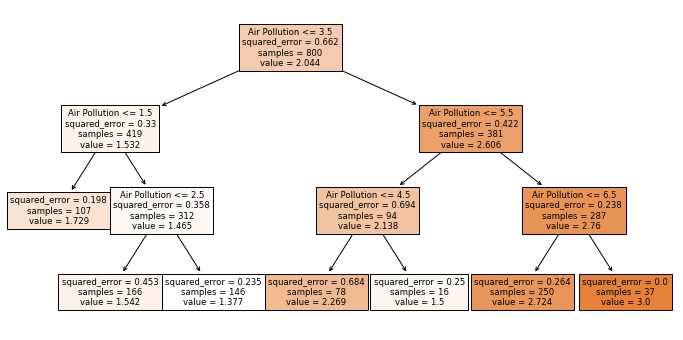

In [12]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plot_tree(regressor, filled=True, feature_names=["Air Pollution"])
plt.show()
